<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/Kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from glob import glob
import re
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Define the folder path in Google Drive (adjust according to your folder structure)
data_path = '/content/drive/MyDrive/Video'

# List .jpg files in the folder
image_paths = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.lower().endswith('.mp4')]

# Print the list of image paths
print(image_paths)

['/content/drive/MyDrive/Video/video-2 clip-1 (30 sec).mp4']


In [4]:
import glob
import re
import os

# Define the folder path in Google Drive
data_path = '/content/drive/MyDrive/Video'

# Use glob to get all jpg files in the folder
# If a filename doesn't have digits, it will be treated as 0 for sorting.
image_paths = sorted(glob.glob(f"{data_path}/*.mp4"), key=lambda x: float(re.findall("(\d+)", x)[0]) if re.findall("(\d+)", x) else 0)

# Print the list of image paths
print(image_paths)

['/content/drive/MyDrive/Video/video-2 clip-1 (30 sec).mp4']


In [5]:
!pip install ultralytics
import cv2
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Load a pretrained YOLOv8n model
cap = cv2.VideoCapture("video-2 clip-1 (30 sec).mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)  # Detect objects
    annotated_frame = results[0].plot()  # Draw bounding boxes
    cv2.imshow("Annotated Video", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

100%|██████████| 6.25M/6.25M [00:00<00:00, 171MB/s]


In [6]:
pip install opencv-python

In [7]:
import cv2
import os

# Create output directory
os.makedirs("frames", exist_ok=True)

# Load video
cap = cv2.VideoCapture("video-2 clip-1 (30 sec).mp4")
frame_number = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Save frame as image
    cv2.imwrite(f"frames/frame_{frame_number:04d}.png", frame)
    frame_number += 1

cap.release()

In [8]:
import cv2
import os

# Create a folder to save extracted frames
output_folder = "frames"
os.makedirs(output_folder, exist_ok=True)

# Load the video file
video_path = "/content/drive/MyDrive/Video/video-2 clip-1 (30 sec).mp4"
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_number = 0

# Loop through video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  # No more frames, end of video

    # Optional: Do something with the frame (e.g., display, process, etc.)

    # Save each frame as an image
    frame_filename = os.path.join(output_folder, f"frame_{frame_number:04d}.png")
    cv2.imwrite(frame_filename, frame)

    frame_number += 1

# Release the video capture object
cap.release()
print(f"Done! Extracted {frame_number} frames to '{output_folder}' folder.")

Done! Extracted 900 frames to 'frames' folder.


In [9]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17430, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17430 (delta 73), reused 28 (delta 26), pack-reused 17327 (from 4)
Receiving objects: 100% (17430/17430), 16.31 MiB | 21.14 MiB/s, done.
Resolving deltas: 100% (11944/11944), done.
/content/yolov5


In [10]:
!python detect.py --source /content/frames --weights yolov5s.pt --conf 0.4 --save-txt --save-conf --project ../output --name annotated_frames

detect: weights=['yolov5s.pt'], source=/content/frames, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../output, name=annotated_frames, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

100% 14.1M/14.1M [00:00<00:00, 169MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/900 /content/frames/frame_0000.png: 384x640 (no detections), 285.5ms
image 2/900 /content/frames/frame_0001.png: 384x640 (no detections), 259.9ms
image 3/900 /content/frames/frame_0002.png: 384x640 1 car, 262.1ms
image 4/900 /content/frames/frame_0003.png: 384x640 1 car, 247.5ms
image 5/900 /content/fr

In [11]:
import cv2
import os

image_folder = "/content/output/annotated_frames"  # Changed to include the subfolder
output_video = "annotated_video.mp4"
fps = 30  # Set your original video's FPS

# Check if the folder exists
if not os.path.exists(image_folder):
    print(f"Error: Folder '{image_folder}' not found. Make sure you have run the object detection and annotation step.")
    exit()

# Get all files with .png extension
images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])

if not images:
    print(f"Error: No image files found in '{image_folder}'.")
    exit()

frame_path = os.path.join(image_folder, images[0])
frame = cv2.imread(frame_path)
height, width, layers = frame.shape

video = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

for image_name in images:
    image = cv2.imread(os.path.join(image_folder, image_name))
    video.write(image)

video.release()
print("✅ Annotated video saved as:", output_video)

✅ Annotated video saved as: annotated_video.mp4


In [14]:
from google.colab import files
files.download('annotated_video.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import cv2
import numpy as np

# Load video
cap = cv2.VideoCapture('annotated_video.mp4')

# Background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Read first frame
ret, first_frame = cap.read()
if not ret:
    print("Error: Could not read frame")
    cap.release()

prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Output video writer
h, w = first_frame.shape[:2]
out = cv2.VideoWriter('obstacle_detected.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (w, h))


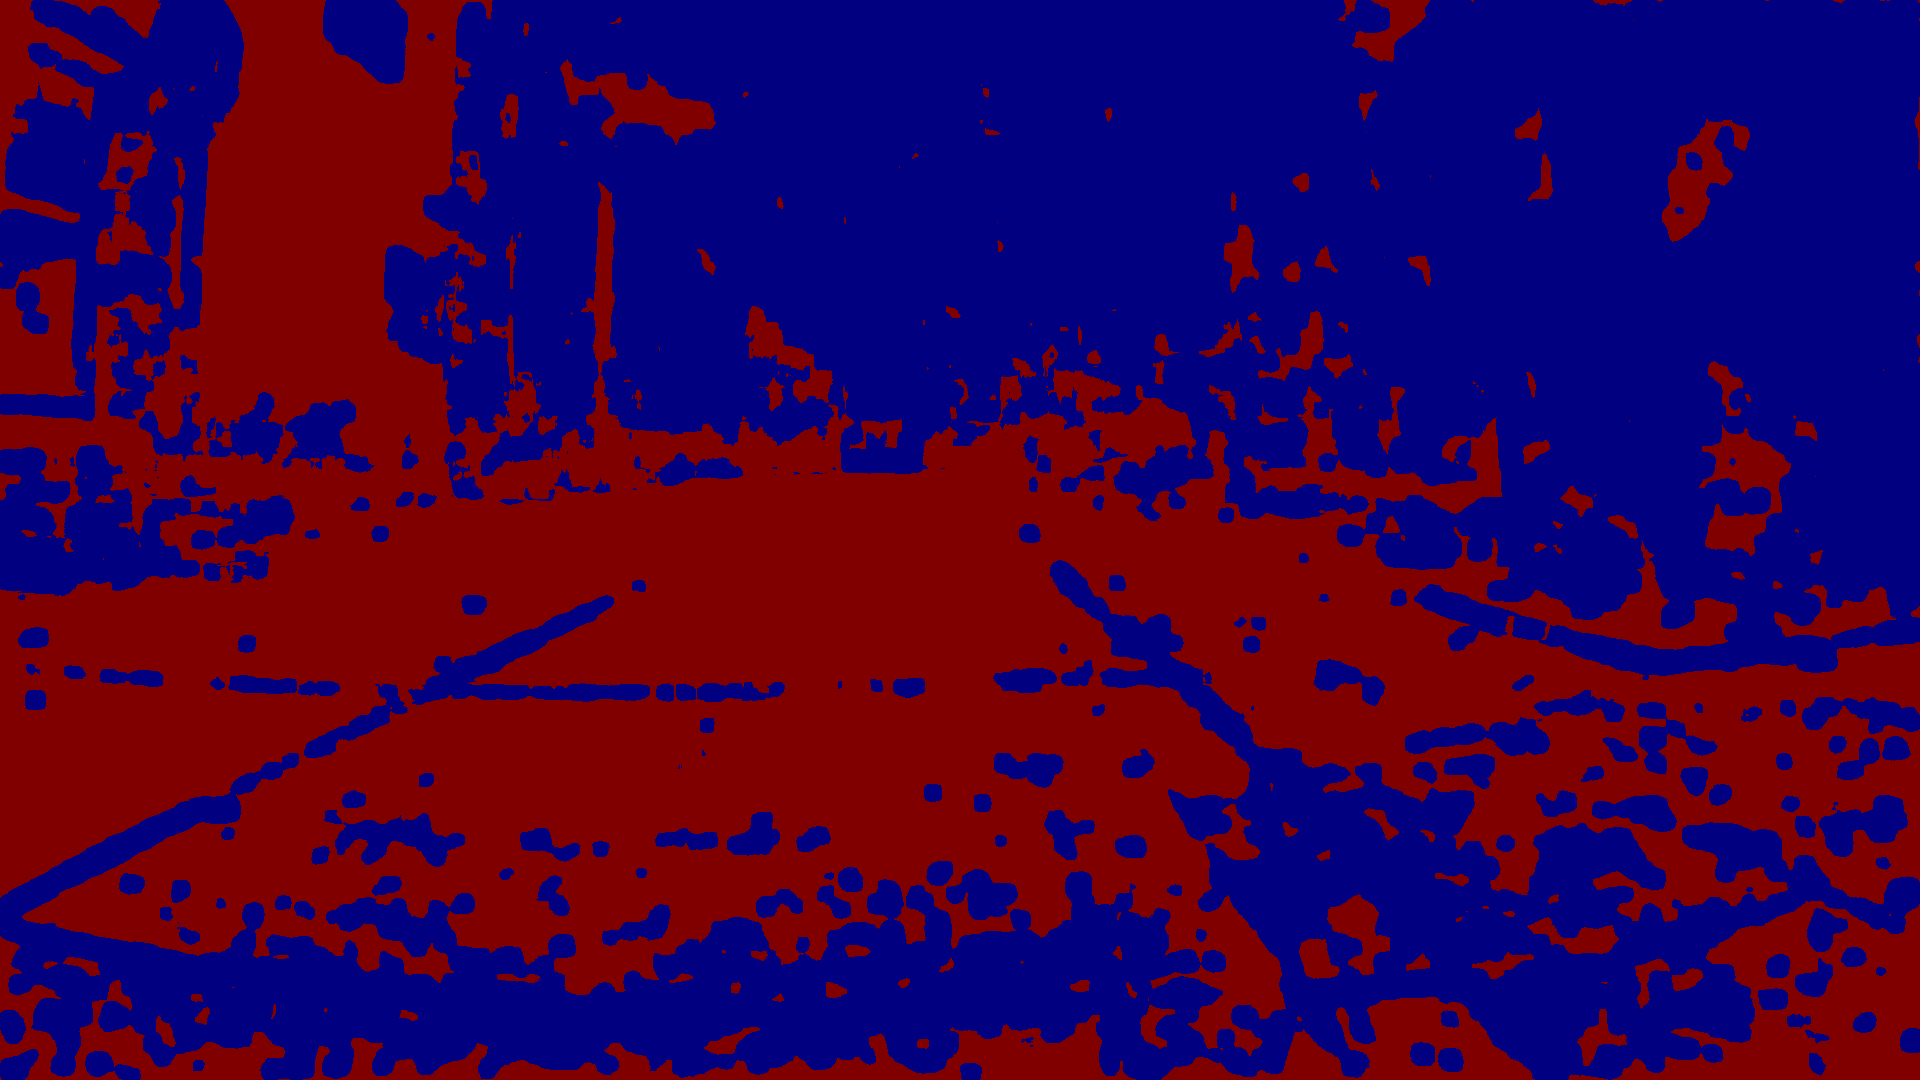

In [18]:
import cv2
import numpy as np
from IPython.display import Image, display  # Import necessary functions

heatmap = np.zeros((h, w), dtype=np.float32)

# In frame loop:
heatmap += (motion_mask / 255).astype(np.float32)

# Normalize & show
norm_heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)
colored_map = cv2.applyColorMap(norm_heatmap.astype(np.uint8), cv2.COLORMAP_JET)

# Convert the colored map to a format suitable for display in Colab
colored_map_rgb = cv2.cvtColor(colored_map, cv2.COLOR_BGR2RGB)  # Convert to RGB
display(Image(data=cv2.imencode('.png', colored_map_rgb)[1].tobytes())) # Display the image

In [19]:
import cv2
import numpy as np
from sklearn.linear_model import LinearRegression
from collections import deque
import matplotlib.pyplot as plt

# Video source
cap = cv2.VideoCapture('annotated_video.mp4')

# Optical flow init
ret, first_frame = cap.read()
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
h, w = first_frame.shape[:2]

# Parameters
trajectory = deque(maxlen=30)  # Store recent positions
frame_count = 0

# Output video writer
out = cv2.VideoWriter('predicted_path.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (w, h))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    motion_mask = (mag > 1.0).astype(np.uint8) * 255

    contours, _ = cv2.findContours(motion_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest = None
    max_area = 0

    # Track largest moving object
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            if cv2.contourArea(cnt) > max_area:
                max_area = cv2.contourArea(cnt)
                largest = cnt

    if largest is not None:
        x, y, w_box, h_box = cv2.boundingRect(largest)
        cx = x + w_box // 2
        cy = y + h_box // 2

        trajectory.append((frame_count, cx, cy))
        cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)
        cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)

    # Fit linear regression and predict future trajectory
    if len(trajectory) >= 10:
        arr = np.array(trajectory)
        times = arr[:, 0].reshape(-1, 1)
        xs = arr[:, 1]
        ys = arr[:, 2]

        model_x = LinearRegression().fit(times, xs)
        model_y = LinearRegression().fit(times, ys)

        future_times = np.array([[frame_count + i] for i in range(1, 31)])
        pred_xs = model_x.predict(future_times).astype(int)
        pred_ys = model_y.predict(future_times).astype(int)

        for px, py in zip(pred_xs, pred_ys):
            if 0 <= px < w and 0 <= py < h:
                cv2.circle(frame, (px, py), 2, (255, 0, 0), -1)

    prev_gray = gray
    frame_count += 1
    out.write(frame)

cap.release()
out.release()
print("Path prediction saved to predicted_path.mp4")


Path prediction saved to predicted_path.mp4


In [20]:
from google.colab import files
files.download('predicted_path.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import cv2
import numpy as np

# Initialize Kalman Filter
kf = cv2.KalmanFilter(4, 2)  # stateSize=4, measSize=2
kf.measurementMatrix = np.array([[1, 0, 0, 0],
                                 [0, 1, 0, 0]], np.float32)

kf.transitionMatrix = np.array([[1, 0, 1, 0],
                                [0, 1, 0, 1],
                                [0, 0, 1, 0],
                                [0, 0, 0, 1]], np.float32)

kf.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03
kf.measurementNoiseCov = np.eye(2, dtype=np.float32) * 1

# Video input
cap = cv2.VideoCapture('annotated_video.mp4')
ret, first_frame = cap.read()
if not ret:
    raise RuntimeError("Failed to read video")

prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
h, w = first_frame.shape[:2]

out = cv2.VideoWriter('kalman_path.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (w, h))
predicted_points = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    motion_mask = (mag > 1.0).astype(np.uint8) * 255

    contours, _ = cv2.findContours(motion_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest = None
    max_area = 0

    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            if cv2.contourArea(cnt) > max_area:
                max_area = cv2.contourArea(cnt)
                largest = cnt

    if largest is not None:
        x, y, w_box, h_box = cv2.boundingRect(largest)
        cx = x + w_box // 2
        cy = y + h_box // 2

        measurement = np.array([[np.float32(cx)], [np.float32(cy)]])
        kf.correct(measurement)

        prediction = kf.predict()
        px, py = int(prediction[0]), int(prediction[1])

        predicted_points.append((px, py))

        # Draw actual and predicted points
        cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)  # Measured position
        cv2.circle(frame, (px, py), 5, (255, 0, 0), -1)  # Predicted position

        # Draw trail of predictions
        for i in range(1, len(predicted_points)):
            cv2.line(frame, predicted_points[i - 1], predicted_points[i], (255, 0, 0), 2)

    prev_gray = gray
    out.write(frame)

cap.release()
out.release()
print("Kalman prediction saved to kalman_path.mp4")


<ipython-input-21-c9b5f3aba19c>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  px, py = int(prediction[0]), int(prediction[1])


Kalman prediction saved to kalman_path.mp4


In [22]:
from google.colab import files
files.download('kalman_path.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>